# Describe a PIV recording

Let's say you recorded multiple PIV images and put them into a *ZIP* folder. The scenario is shown below. We will describe the data stored in the zip folder using linked-data syntax. The collection of PIV images is called a *dataset*. The information about it will be stored in a JSON-LD file:

![piv_image_dataset_management](piv_image_dataset_management.svg)

The ["PIV Challenge"](https://www.pivchallenge.org/) datasets will serve as real-world examples. We will describe one of them.

Before we start, let's get clear about the vocabulary/semantic:

We will use multiple vocabularies and ontologies. At the core, we will use the "Data Catalog Vocabulary" (dcat), which allows describing datasets. According to [dcat](https://www.w3.org/TR/vocab-dcat-2/), dataset and distribution, the main objects in our problem are described as follows:
- *dcat:Dataset*: "A collection of data, published or curated by a single agent, and available for access or download in one or more representations."
- *dcat:Distribution*: "A specific representation of a dataset. A dataset might be available in multiple serializations that may differ in various ways, including natural language, media-type or format, schematic organization, temporal and spatial resolution, level of detail or profiles (which might specify any or all of the above)."

Besides the description of file objects (*dcat:Distribution*), the dataset has many more properties, like the creator, a description and more such fields. We will add all this below.

## Imports

We will import some namespace modules, which are provided by `pivmetalib`. All these namespace modules contain classes representing the concepts of their ontology. E.g. `prov` contains the class `Person` and describes [*prov:Person*](https://www.w3.org/ns/prov#Person). The most important properties of a person, such as the first and last name, the email or a researcher ID is implemented as class attributes. Learn more bout in in the [GettingStarted Notebook](./GettingStarted.ipynb)

Here's an example for a Person:

In [1]:
from pivmetalib import prov

creator = prov.Person(
    lastName='Okamoto',
    mbox="okamoto@tokai.t.u-tokyo.ac.jp"
)
creator

Person(mbox=okamoto@tokai.t.u-tokyo.ac.jp, lastName=Okamoto, )

Other important modules are `dcat` and `pivmeta`. The namespace module `dcat` contains *Distribution* and *Dataset*. The *pivmeta*-ontology provides many more PIV-specific concepts, among others it defines e.g. *PIVImageDistribution*, which is a (sub)type of *Distribution* and tells us, that the distribution contains PIV images as compared to other regular files, like README files, for example.

Let's import the other modules:

In [2]:
from pivmetalib import dcat # dcat import Dataset, Distribution
from pivmetalib import pivmeta # we will need PivImageDistribution
from pivmetalib import PIVMETA  # the namespace module containing the URI addresses

## Describe the dataset

The package `pivmetalib` has implemented the [RDF](https://www.w3.org/RDF/) vocabularies as python objects. Their parameters validated.

Let's first examine this by creating the person, who created the dataset:

In [3]:
creator = prov.Person(
    lastName='Okamoto',
    mbox="okamoto@tokai.t.u-tokyo.ac.jp"
)
creator

Person(mbox=okamoto@tokai.t.u-tokyo.ac.jp, lastName=Okamoto, )

Now, let's describe the complete dataset:

In [4]:
ds = dcat.Dataset(
    title='piv-challenge-1-C',
    creator=prov.Person(lastName='Okamoto', mbox="okamoto@tokai.t.u-tokyo.ac.jp"),  # or =creator from above
    modified="2000-10-28",
    landingPage="https://www.pivchallenge.org/pub/index.html#c",
    description="Different velocity gradients with spatially varying image quality (provided by Okamoto) < synthetic > [256 x 128]",
    distribution=[
        pivmeta.PivImageDistribution(
            title='raw piv image data',
            downloadURL='https://www.pivchallenge.org/pub/C/C.zip',
            mediaType='application/zip',
            pivImageType=PIVMETA.SyntheticImage,
            numberOfRecords=1,  # It contains one double image
            filenamePattern=r"^C\d{3}_\d.tif$",  # the regex for the filename
            imageBitDepth=8
        ),
        pivmeta.PivMaskDistribution(
            title='mask data',
            downloadURL='https://www.pivchallenge.org/pub/C/C.zip',
            mediaType='application/zip',
            filenamePattern="^Cmask_1.tif$",  # the regex for the filename
        ),
        dcat.Distribution(
            title='ReadMe file',
            downloadURL='https://www.pivchallenge.org/pub/E/readmeE.txt'
        ),
    ]
)

## Export to JSON-LD

The dataset python object can be written to JSON-LD like so:

In [5]:
with open('piv_challenge.jsonld', 'w') as f:
    json_ld_str = ds.dump_jsonld()
    f.write(
        ds.dump_jsonld()
    )
print(json_ld_str)

{
    "@context": {
        "@import": "https://raw.githubusercontent.com/matthiasprobst/pivmeta/main/pivmeta_context.jsonld"
    },
    "@graph": [
        {
            "@id": "https://local-domain.org/2e3ba395-5f74-43dc-8b33-ebcaca9e84ac",
            "@type": "piv mask distribution",
            "dct:title": "mask data",
            "download URL": "https://www.pivchallenge.org/pub/C/C.zip",
            "filenamePattern": "^Cmask_1.tif$",
            "media type": "https://www.iana.org/assignments/media-types/application/zip"
        },
        {
            "@id": "https://local-domain.org/b7d726b8-7df5-4220-b6c1-703aec1047d4",
            "@type": "person",
            "foaf:lastName": "Okamoto",
            "foaf:mbox": "okamoto@tokai.t.u-tokyo.ac.jp"
        },
        {
            "@id": "https://local-domain.org/aee9a021-c2e2-4f31-90c5-fe28ea98748d",
            "@type": "dataset",
            "dcat:landingPage": "https://www.pivchallenge.org/pub/index.html#c",
            "

## Re-use the dataset

Now, that we have written the metadata to the file, we would like to reuse it, i.e. identify specific data

### Find distribution within JSON-LD file

In [6]:
import pivmetalib

In [7]:
dss = pivmetalib.query(dcat.Dataset, source='piv_challenge.jsonld')
ds = dss[0]
ds.model_dump(exclude_none=True)

{'id': 'https://local-domain.org/6f638425-feed-4773-b541-ae0efb920050',
 'title': 'piv-challenge-1-C',
 'description': 'Different velocity gradients with spatially varying image quality (provided by Okamoto) < synthetic > [256 x 128]',
 'creator': {'mbox': 'okamoto@tokai.t.u-tokyo.ac.jp',
  'type': 'http://www.w3.org/ns/prov#Person',
  'lastName': 'Okamoto'},
 'distribution': [{'title': 'raw piv image data',
   'downloadURL': Url('https://www.pivchallenge.org/pub/C/C.zip'),
   'mediaType': Url('https://www.iana.org/assignments/media-types/application/zip'),
   'type': 'https://matthiasprobst.github.io/pivmeta#PivImageDistribution',
   'filenamePattern': '^C\\d{3}_\\d.tif$',
   'imageBitDepth': '8',
   'numberOfRecords': '1',
   'pivImageType': 'https://matthiasprobst.github.io/pivmeta#SyntheticImage'},
  {'title': 'mask data',
   'downloadURL': Url('https://www.pivchallenge.org/pub/C/C.zip'),
   'mediaType': Url('https://www.iana.org/assignments/media-types/application/zip'),
   'type'

In [8]:
ds.creator

Agent(mbox=okamoto@tokai.t.u-tokyo.ac.jp, type=http://www.w3.org/ns/prov#Person, lastName=Okamoto)

In [9]:
image_dists = pivmetalib.query(pivmeta.PivImageDistribution, source='piv_challenge.jsonld')
image_dist = image_dists[0]

In [10]:
from pprint import pprint
pprint(image_dist.model_dump())

{'byteSize': None,
 'creator': None,
 'description': None,
 'downloadURL': Url('https://www.pivchallenge.org/pub/C/C.zip'),
 'filenamePattern': '^C\\d{3}_\\d.tif$',
 'id': 'https://local-domain.org/7fb6351b-dbd0-464f-ae17-3052201bbcbc',
 'imageBitDepth': 8,
 'keyword': None,
 'label': None,
 'mediaType': Url('https://www.iana.org/assignments/media-types/application/zip'),
 'numberOfRecords': 1,
 'pivImageType': Url('https://matthiasprobst.github.io/pivmeta#SyntheticImage'),
 'title': 'raw piv image data',
 'type': {},
 'version': None}


In [11]:
zip_filename = image_dist.download(dest_filename='imgs.zip', overwrite_existing=False)

In [12]:
import zipfile
import re
from typing import Union
import pathlib

def get_files(img_dir, pattern: Union[re.Pattern, str]):
    img_dir = pathlib.Path(img_dir)
    if isinstance(pattern, str):
        pattern = re.compile(pattern)
    filenames = []
    for f in img_dir.iterdir():
        if f.is_file():
            if pattern.match(f.name):
                filenames.append(f)
    return filenames

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('imgs')

In [13]:
get_files('imgs', image_dist.filenamePattern)

[WindowsPath('imgs/C001_1.tif'), WindowsPath('imgs/C001_2.tif')]

In [14]:
image_dist.is_synthetic()

False

In [15]:
mask_dists = pivmetalib.query(pivmeta.PivMaskDistribution, source='piv_challenge.jsonld')
mask_dist = mask_dists[0]

In [16]:
get_files('imgs', mask_dist.filenamePattern)

[WindowsPath('imgs/Cmask_1.tif')]

In [17]:
import cv2
import pivimage

(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

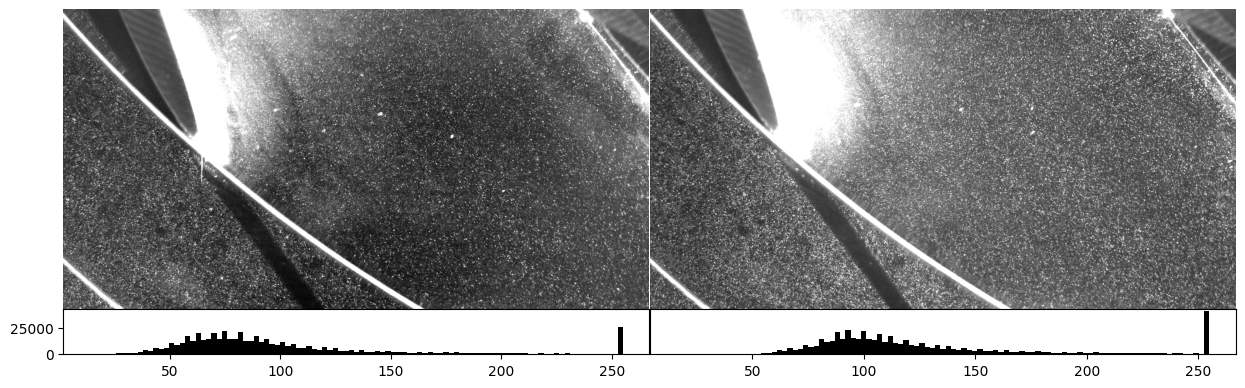

In [18]:
pivimage.PIVImagePair('imgs/C001_1.tif', 'imgs/C001_2.tif').plot()

In [19]:
import h5rdmtoolbox as h5tbx

In [20]:
piv_software = pivmeta.PIVSoftware(
    id='https://www.mypivsoftware.com/',
    author=prov.Organisation(
        name='MyPIVSoftware GmbH',
        mbox='info@mypivsoftware.com',
        url='https://www.mypivsoftware.com/'
    ),
    hasDocumentation='https://www.mypivsoftware.com/download/docs/Manual.pdf',
)
from pprint import pprint
# pprint(piv_software.dump_jsonld())
# pprint(piv_software.model_dump_namespaced())
with h5tbx.File('piv_software.h5', 'w') as h5:
    piv_software.dump_hdf(h5.create_group('my_piv_software'))
    h5.dump()

In [21]:
from h5rdmtoolbox import jsonld
import pivmetalib
from pprint import pprint

In [22]:
with h5tbx.File('piv_software.h5', 'r') as h5:
    pprint(jsonld.dumpd(h5['my_piv_software'],
                      context=pivmetalib.get_context_json())['@graph'])
    pprint(jsonld.dumpd(h5['my_piv_software']))

[{'@id': 'https://www.mypivsoftware.com/', '@type': 'Piv Software'},
 {'@id': 'local::/my_piv_software/author',
  '@type': 'https://www.w3.org/ns/prov#Organisation',
  'foaf:mbox': 'info@mypivsoftware.com',
  'foaf:name': 'MyPIVSoftware GmbH',
  'http://schema.org/url': 'https://www.mypivsoftware.com/'}]
[{'@id': 'https://www.mypivsoftware.com/',
  '@type': ['https://matthiasprobst.github.io/pivmeta#PIVSoftware']},
 {'@id': 'local::/my_piv_software/author',
  '@type': ['https://www.w3.org/ns/prov#Organisation'],
  'http://schema.org/url': [{'@value': 'https://www.mypivsoftware.com/'}],
  'http://xmlns.com/foaf/0.1/mbox': [{'@value': 'info@mypivsoftware.com'}],
  'http://xmlns.com/foaf/0.1/name': [{'@value': 'MyPIVSoftware GmbH'}]}]


In [23]:
with h5tbx.File(mode='w') as h5:
    g = h5.create_group('my dataset')
    ds.dump_hdf(g)
    h5.dump()

In [24]:
print(ds.dump_jsonld())

{
    "@context": {
        "@import": "https://raw.githubusercontent.com/matthiasprobst/pivmeta/main/pivmeta_context.jsonld"
    },
    "@graph": [
        {
            "@id": "https://local-domain.org/9be2a001-fa9f-4e9d-a2a1-9cf471b0f6aa",
            "@type": "distribution",
            "dct:title": "raw piv image data",
            "download URL": "https://www.pivchallenge.org/pub/C/C.zip",
            "filenamePattern": "^C\\d{3}_\\d.tif$",
            "imageBitDepth": "8",
            "media type": "https://www.iana.org/assignments/media-types/application/zip",
            "numberOfRecords": "1",
            "pivImageType": "https://matthiasprobst.github.io/pivmeta#SyntheticImage",
            "type": "https://matthiasprobst.github.io/pivmeta#PivImageDistribution"
        },
        {
            "@id": "https://local-domain.org/6f638425-feed-4773-b541-ae0efb920050",
            "@type": "dataset",
            "dcat:landingPage": "https://www.pivchallenge.org/pub/index.html#c",


In [25]:
import rdflib

In [27]:
jdict = ds.dump_jsonld()

In [28]:
g = rdflib.Graph()
g.parse(data=jdict, format='json-ld')
for t in g:
    print(t)

(rdflib.term.URIRef('https://local-domain.org/3adca351-693d-4638-ba92-7342a34e4dcf'), rdflib.term.URIRef('https://matthiasprobst.github.io/pivmeta#pivImageType'), rdflib.term.Literal('https://matthiasprobst.github.io/pivmeta#SyntheticImage'))
(rdflib.term.URIRef('https://local-domain.org/6f638425-feed-4773-b541-ae0efb920050'), rdflib.term.URIRef('https://matthiasprobst.github.io/pivmeta#type'), rdflib.term.Literal('{}'))
(rdflib.term.URIRef('https://local-domain.org/3adca351-693d-4638-ba92-7342a34e4dcf'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/ns/dcat#Distribution'))
(rdflib.term.URIRef('https://local-domain.org/6f638425-feed-4773-b541-ae0efb920050'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/ns/dcat#Dataset'))
(rdflib.term.URIRef('https://local-domain.org/3adca351-693d-4638-ba92-7342a34e4dcf'), rdflib.term.URIRef('dct:title'), rdflib.term.Literal('ra

In [29]:
with open('piv_record.json', 'w') as f:
    f.write(g.serialize(format='json-ld', context={"@import": "https://raw.githubusercontent.com/matthiasprobst/pivmeta/main/pivmeta_context.jsonld"}))